# Anomaly Detection

**Project Overview** <br>
Implement and understand the application of a number of outlier/anomaly detection algorithms

**Project Aim** <br>
- The purpose of this project is to solve a classification problem in relation to anomaly detection
- The objective of the network optimization team is to analyze traces of past activity, which will be used to train an ML system capable of classifying samples of current activity as:
    - 0 (normal): current activity corresponds to normal behavior of any working day. Therefore, no reconfiguration or redistribution of resources is needed.
    - 1 (unusual): current activity slightly differs from the behavior usually observed for that time of the day (e.g. due to a strike, demonstration, sports event, etc.), which should trigger a reconfiguration of the base station.
    
**Project Value**
- Target Benefits: Why are we doing this project and where is the value?
- Business Needs
    - Identifying all of the available benefits (not just ‘enough benefits’ to get the project approved)
    - Defining specific measurable end states—the desired business outcomes—that need to be achieved in the business for the benefits to be delivered in full (filling the ‘gap’)
    - Maximizing and then quantifying all of the available financial benefits
    - Identifying the change activities required to deliver these outcomes, benefits and value.

**Data** <br>
https://www.kaggle.com/c/anomaly-detection-in-cellular-networks/data
https://towardsdatascience.com/adrepository-anomaly-detection-datasets-with-real-anomalies-2ee218f76292

During two weeks, different metrics were gathered from a set of 10 base stations, each having a different number of cells, every 15 minutes

The dataset is split into training (approx. 80%) and test (approx. 20%) subsets provided as two separate CSV files
- The training set: ML-MATT-CompetitionQT1920_train.csv contains 36,904 samples, each having 13 features and a label. <u>Note that there may be erroneous samples and outliers.</u>
- The test set: ML-MATT-CompetitionQT1920_test.csv contains 9,158 samples following the same structure as the training set but not including the labels.

- Column Definitions
    - Time : hour of the day (in the format hh:mm) when the sample was generated.
    - CellName1: text string used to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station (see the example in the right figure).
    - PRBUsageUL and PRBUsageDL: level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - meanThrDL and meanThrUL: average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - maxThrDL and maxThrUL: maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - meanUEDL and meanUEUL: average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - maxUEDL and maxUEUL: maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
    - maxUE_UL+DL: maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.
    - Unusual: labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior.


**Scope**
- Implement statistical imputation measures using SimpleImputer from Sklearn

**Algorithms to Implement** <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
- [x] Z Score (& Modified Z Score)
- IQR Univariate Outlier Detection
- DBSCAN
- Isolation Forests
- Local Outlier Factor
- Minimum Covariance Determinant (Elliptic Envelope)
- One-Class Support Vector Machines


**Plot Results and Decision Boundaries and comment on behaviour**


**Loss Functions to Consider**
- Confusion Matrix

**Benchmark Perfomance**
- Top 10: 0.99244
- Top 20: 0.88193
- Worst: 0.41447

**Resources - Exploratory Data Analysis** <br>
https://towardsdatascience.com/organize-your-data-and-models-using-the-object-oriented-programming-and-pickle-876a6654494 <br>
https://www.brighthubpm.com/project-planning/128738-are-your-projects-delivering-business-value/ <br>

**Resources - Anomaly Detection** <br>
Andew Ng - Machine Learning Tutorials (YouTube) <br>
Multivariate Unsupervised Machine Learning for Anomaly Detection in Enterprise Applications.pdf <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ <br>
https://www.bmc.com/blogs/outlier-and-anomaly-detection/ <br>
https://machinelearningmastery.com/one-class-classification-algorithms/ <br>
https://medium.com/sciforce/anomaly-detection-another-challenge-for-artificial-intelligence-c69d414b14db <br>
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf <br>
https://towardsdatascience.com/detecting-weird-data-conformal-anomaly-detection-20afb36c7bcd <br>
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ <br>
https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8 <br>
https://towardsdatascience.com/unsupervised-machine-learning-approaches-for-outlier-detection-in-time-series-using-python-5759c6394e19 <br>
https://medium.com/pinterest-engineering/building-a-real-time-anomaly-detection-system-for-time-series-at-pinterest-a833e6856ddd <br>
https://towardsdatascience.com/identifying-outliers-with-local-outlier-probabilities-2b5781e86e01#:~:text=By%20comparing%20the%20local%20density,to%20their%20Local%20Outlier%20Probability. <br>
https://medium.com/swlh/anomaly-detection-techniques-part-1-962b0494f9cf <br>
https://towardsdatascience.com/use-the-isolated-forest-with-pyod-3818eea68f08 <br>

In [1]:
#!pip install --upgrade pip
#!pip install watermark
#!pip install -e git+https://github.com/rasbt/watermark#egg=watermark
#!pip install seaborn
#!pip install markdown-checklist
#!pip install tqdm #tqdm
#!pip install ipywidgets #tqdm
#!jupyter nbextension enable --py widgetsnbextension #tqdm

In [2]:
%load_ext autoreload
%autoreload 2
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [3]:
# Standard Set Up
# Base libraries
import os
import time
import datetime
import json
import markdown

# Scientific libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Helper libraries
from tqdm.notebook import tqdm, trange
from colorama import Fore, Back, Style # Add Colour to Outputs
import warnings
warnings.filterwarnings('ignore')

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
# most definitely plotly

# Visual setup
plt.style.use('fivethirtyeight')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina' # Plotting pretty figures and avoid blurry images
sns.set_context('talk') # Larger scale for plots in notebooks


# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell # Enable multiple cell outputs avoiding the need to call display()
InteractiveShell.ast_node_interactivity = 'all'

# Seed value for numpy.random
np.random.seed(42)

# Watermark modules
# import watermark
# import scipy as sp
# from sklearn import metrics
# import numpy.linalg as linalg

# Project Specific 
from sklearn.covariance import EllipticEnvelope # Algorithm One
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


Bad key text.latex.unicode in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotli

In [4]:
train_df = pd.read_csv('/Users/Rej1992/Documents/AnomalieDetectionMethods_RawData/ML-MATT-CompetitionQT1920_train.csv')
test_df = pd.read_csv('/Users/Rej1992/Documents/AnomalieDetectionMethods_RawData/ML-MATT-CompetitionQT1920_test.csv')

## Data Preprocessing

In [5]:
def duplicated_indicies(data):
    
    ''' This function returns the number of row index for duplicated elements '''
    
    return data[data.duplicated()].index


def determine_class_imbalance(data, col):
    
    ''' This function determines the class imbalace associated with the target class '''
    
    return data[col].value_counts()


def correct_category_datatype(data, cols):
    
    ''' This function corrects category type variables'''
    
    return data[cols].astype('category')


**Generic Data Overview**

In [6]:
print('Columns not shared across train/test dataset : {}'.format(set(train_df.columns) - set(test_df.columns)))

Columns not shared across train/test dataset : {'Unusual'}


In [7]:
print('The train/test split for data : {} '.format(round(len(test_df)/len(train_df),2)))

The train/test split for data : 0.25 


In [8]:
print('Training Dataframe dimensions {}'.format(train_df.shape))
print('Training Dataframe dimensions {}'.format(test_df.shape))

Training Dataframe dimensions (36904, 14)
Training Dataframe dimensions (9158, 13)


In [9]:
train_df.info()
train_df.head()
train_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36899 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE      11.642       1.393       0.370       0.041     15.655   
1  09:45    1BLTE      21.791       1.891       0.537       0.268     10.273   
2  07:45    9BLTE       0.498       0.398       0.015       0.010      0.262   
3  02:45    4ALTE       1.891       1.095       0.940       0.024     60.715   
4  03:30   10BLTE       0.303       0.404       0.016       0.013      0.348   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      0.644      1.114      1.025       4.0       3.0           7        1  
1      1.154      1.353      1.085       6.0       4.0          10        1  
2      0.164      0.995      0.995       1.0       1.0           2        1  
3      0.825      1.035      0.995       2.0       2.0           4        1  
4      0.168      1.011      1.011       2.0       1.0           3        0

Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  \
36899  21:30    6ALTE       7.579       0.808       0.164       0.037   
36900  09:45    8CLTE       9.095       1.213       0.189       0.030   
36901  13:30    9BLTE       4.378       0.896       0.341       0.030   
36902  12:30    3CLTE      13.339       2.728       0.559       0.065   
36903  15:45    5BLTE      22.231       2.627       0.814       0.076   

       maxThr_DL  maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL  \
36899      7.980      0.375      1.101      0.010       4.0       3.0   
36900     19.510      1.583      1.122      1.031       4.0       2.0   
36901     12.037      0.540      1.065      1.005       4.0       3.0   
36902     28.187      0.894      1.223      1.061       5.0       4.0   
36903     80.804      0.852      1.324      1.142       6.0       4.0   

      maxUE_UL+DL  Unusual  
36899           7        0  
36900           6        0  
36901           7        1  
36902           9        0  
36903          10        0

**Helper Functions**

In [10]:
print('Duplicated Rows :', len(duplicated_indicies(train_df)))

Duplicated Rows : 106


In [11]:
determine_class_imbalance(train_df, 'Unusual')

0    26721
1    10183
Name: Unusual, dtype: int64

In [12]:
train_df[['CellName', 'maxUE_UL+DL']] = correct_category_datatype(train_df, ['CellName', 'maxUE_UL+DL'])

In [13]:
train_df.head()

Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE      11.642       1.393       0.370       0.041     15.655   
1  09:45    1BLTE      21.791       1.891       0.537       0.268     10.273   
2  07:45    9BLTE       0.498       0.398       0.015       0.010      0.262   
3  02:45    4ALTE       1.891       1.095       0.940       0.024     60.715   
4  03:30   10BLTE       0.303       0.404       0.016       0.013      0.348   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      0.644      1.114      1.025       4.0       3.0           7        1  
1      1.154      1.353      1.085       6.0       4.0          10        1  
2      0.164      0.995      0.995       1.0       1.0           2        1  
3      0.825      1.035      0.995       2.0       2.0           4        1  
4      0.168      1.011      1.011       2.0       1.0           3        0

In [14]:
train_df.describe()

PRBUsageUL    PRBUsageDL    meanThr_DL    meanThr_UL     maxThr_DL  \
count  36904.000000  36904.000000  36904.000000  36904.000000  36904.000000   
mean       7.835090      2.106396      0.560525      0.067610     17.764369   
std        8.428206      2.247514      0.727623      0.186555     15.739932   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.213000      0.707000      0.140000      0.021000      5.710750   
50%        4.547000      1.314000      0.352000      0.040000     14.170000   
75%       12.126000      2.728000      0.718000      0.075000     25.059500   
max       51.333000     77.505000     19.601000     12.461000    140.008000   

          maxThr_UL     meanUE_DL     meanUE_UL      maxUE_DL      maxUE_UL  \
count  36904.000000  36904.000000  36904.000000  36815.000000  36815.000000   
mean       1.791974      1.173441      0.665143      4.190819      3.063371   
std        5.028928      0.214065      0.535493      1.772484      1.387446   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.362000      1.041000      0.010000      3.000000      2.000000   
50%        0.703000      1.112000      1.011000      4.000000      3.000000   
75%        1.242000      1.263000      1.051000      5.000000      4.000000   
max       48.253000      2.915000      2.668000     12.000000     12.000000   

            Unusual  
count  36904.000000  
mean       0.275932  
std        0.446989  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

## Exploratory Data Analysis 
- [x] Implement 'replace' function as suggested in reference: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b <br>
- [x] Implement solution based on reference: https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

In [15]:
train_df.head()

Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE      11.642       1.393       0.370       0.041     15.655   
1  09:45    1BLTE      21.791       1.891       0.537       0.268     10.273   
2  07:45    9BLTE       0.498       0.398       0.015       0.010      0.262   
3  02:45    4ALTE       1.891       1.095       0.940       0.024     60.715   
4  03:30   10BLTE       0.303       0.404       0.016       0.013      0.348   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      0.644      1.114      1.025       4.0       3.0           7        1  
1      1.154      1.353      1.085       6.0       4.0          10        1  
2      0.164      0.995      0.995       1.0       1.0           2        1  
3      0.825      1.035      0.995       2.0       2.0           4        1  
4      0.168      1.011      1.011       2.0       1.0           3        0

**Missing Value Treatment**

In [16]:
def identify_missing_values(train_data):

    ''' This function identifies the amount of missing data per variable'''
    
    print('Nan values =', train_data.isnull().sum().sum())
    print("""""")

    vars_with_missing = []

    for feature in train_data.columns:
        missings = train_data[feature].isna().sum()

        if missings > 0 :
            vars_with_missing.append(feature)
            missings_perc = missings / train_data.shape[0]

            print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
    print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In [17]:
identify_missing_values(train_df)

Nan values = 183

Variable maxUE_DL has 89 records (0.24%) with missing values.
Variable maxUE_UL has 89 records (0.24%) with missing values.
Variable maxUE_UL+DL has 5 records (0.01%) with missing values.
In total, there are 3 variables with missing values


In [18]:
# Check if NaN records for maxUE_DL and maxUE_UL are the same
assert train_df.maxUE_DL.isnull().all() == train_df.maxUE_UL.isnull().all()

In [19]:
train_df[(train_df.maxUE_DL.isnull()) | (train_df.maxUE_UL.isnull())]

Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  \
51     16:15    6ALTE      13.743       4.042       2.113       0.100   
1290   14:30    3BLTE      22.837       2.324       0.500       0.090   
2082   06:15    7ULTE       0.199       1.791       0.693       0.032   
2842   16:15    5ALTE       9.903       1.516       0.466       0.032   
3384   16:15    7CLTE       0.404       0.909       0.216       0.042   
...      ...      ...         ...         ...         ...         ...   
36036  06:00    9BLTE       1.516       0.505       0.078       0.013   
36046  13:00    3CLTE      15.360       2.829       1.149       0.071   
36317  13:00    1ALTE      30.921       4.042       1.450       0.175   
36652  08:00    7VLTE       0.606       1.819       0.255       0.027   
36687  08:00    7ULTE       1.011       2.021       0.310       0.042   

       maxThr_DL  maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL  \
51        44.483      1.110        0.0        0.0       NaN       NaN   
1290      24.374      0.847        0.0        0.0       NaN       NaN   
2082      15.634      0.353        0.0        0.0       NaN       NaN   
2842      24.576      0.931        0.0        0.0       NaN       NaN   
3384       9.730      2.714        0.0        0.0       NaN       NaN   
...          ...        ...        ...        ...       ...       ...   
36036      1.298      0.267        0.0        0.0       NaN       NaN   
36046     39.615      0.947        0.0        0.0       NaN       NaN   
36317     26.369      1.487        0.0        0.0       NaN       NaN   
36652     14.546      0.820        0.0        0.0       NaN       NaN   
36687     17.361      2.394        0.0        0.0       NaN       NaN   

      maxUE_UL+DL  Unusual  
51       #°VALOR!        0  
1290     #°VALOR!        0  
2082     #°VALOR!        1  
2842     #°VALOR!        0  
3384     #°VALOR!        0  
...           ...      ...  
36036    #°VALOR!        0  
36046    #°VALOR!        0  
36317    #°VALOR!        0  
36652    #°VALOR!        0  
36687    #°VALOR!        0  

[89 rows x 14 columns]

In [20]:
train_df[train_df['maxUE_UL+DL'].isnull()]
#train_df[train_df['maxUE_UL+DL'].isnull()]['meanUE_DL'].value_counts()
#train_df[train_df['maxUE_UL+DL'].isnull()]['meanUE_UL'].value_counts()

Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  \
5582   14:00    4CLTE      17.313       1.891       0.654       0.061   
9196   19:30   10CLTE       7.065       1.493       0.319       0.029   
13937  06:15   10CLTE       2.090       0.498       0.113       0.023   
21926  12:00    4CLTE      14.450       2.223       0.435       0.049   
33791  15:00    4CLTE      10.647       1.194       0.413       0.038   

       maxThr_DL  maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL  \
5582      38.028      1.509        0.0        0.0       NaN       NaN   
9196      16.186      0.722        0.0        0.0       NaN       NaN   
13937      4.431      0.583        0.0        0.0       NaN       NaN   
21926     17.349      0.750        0.0        0.0       NaN       NaN   
33791     22.439      2.034        0.0        0.0       NaN       NaN   

      maxUE_UL+DL  Unusual  
5582          NaN        1  
9196          NaN        1  
13937         NaN        1  
21926         NaN        0  
33791         NaN        1

In [21]:
# Replace incorrect value #°VALOR! as NaN
train_df['maxUE_UL+DL'] = train_df['maxUE_UL+DL'].replace('#°VALOR!', np.nan)
train_df['maxUE_UL+DL'].isnull().sum()

89

**Statistical Imputation of meanUE_UL & maxUE_DL** <br>
- The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation.
- Common statistics calculated include:
    - The column mean value
    - The column median value
    - The column mode value
    - A constant value

In [22]:
# evaluate each strategy on the dataset
strategies = ['mean', 'median', 'most_frequent', 'constant']
cols = ['maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']

for col in cols:
    for s in strategies:
        # create the modeling pipeline
        imputer = SimpleImputer(strategy=s)
        trans_data = pd.DataFrame(train_df[col])
        imputer.fit(trans_data)
        train_df[s+'_'+col] = imputer.transform(trans_data)

SimpleImputer()

SimpleImputer(strategy='median')

SimpleImputer(strategy='most_frequent')

SimpleImputer(strategy='constant')

SimpleImputer()

SimpleImputer(strategy='median')

SimpleImputer(strategy='most_frequent')

SimpleImputer(strategy='constant')

SimpleImputer()

SimpleImputer(strategy='median')

SimpleImputer(strategy='most_frequent')

SimpleImputer(strategy='constant')

In [23]:
#train_df[train_df['maxUE_UL+DL'].isnull()][['maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL', 'most_frequent_maxUE_DL']]
#train_df.most_frequent_maxUE_DL.value_counts()

**Categorical Data EDA**
- Does there seems to be any particular time of day when issues tend to occur more than others?
- Do any particular cell blocks tend to have more issues than others?

In [24]:
def _cat_count_plot(data, categorical_col, facet_group):
    # Set Plot Parameters
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(22, 6.75)})

    # Plot the function
    sns.countplot(x = categorical_col,
                  data = data,
                  hue=facet_group,
                  order = data[categorical_col].value_counts().index)
    plt.xticks(rotation=45)

    plt.show()

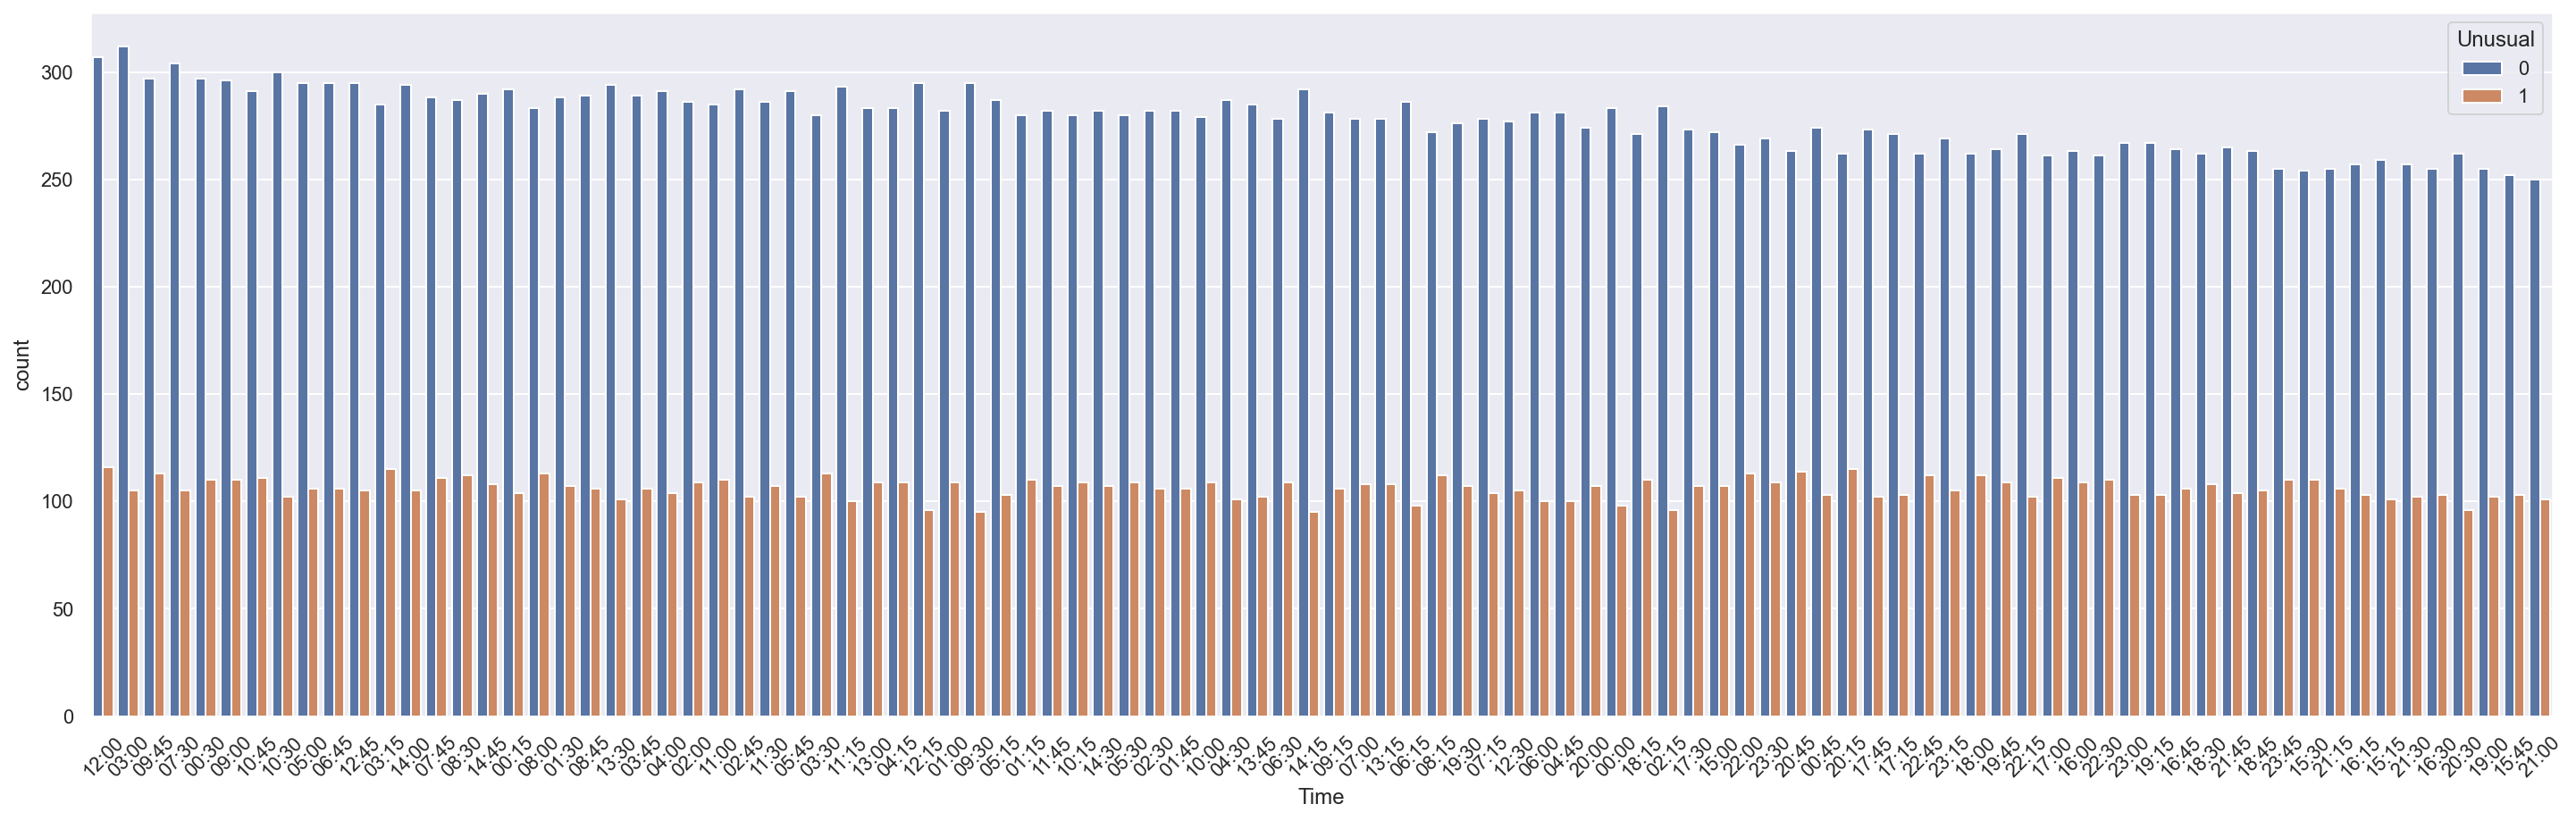

In [25]:
_cat_count_plot(train_df, 'Time', 'Unusual')

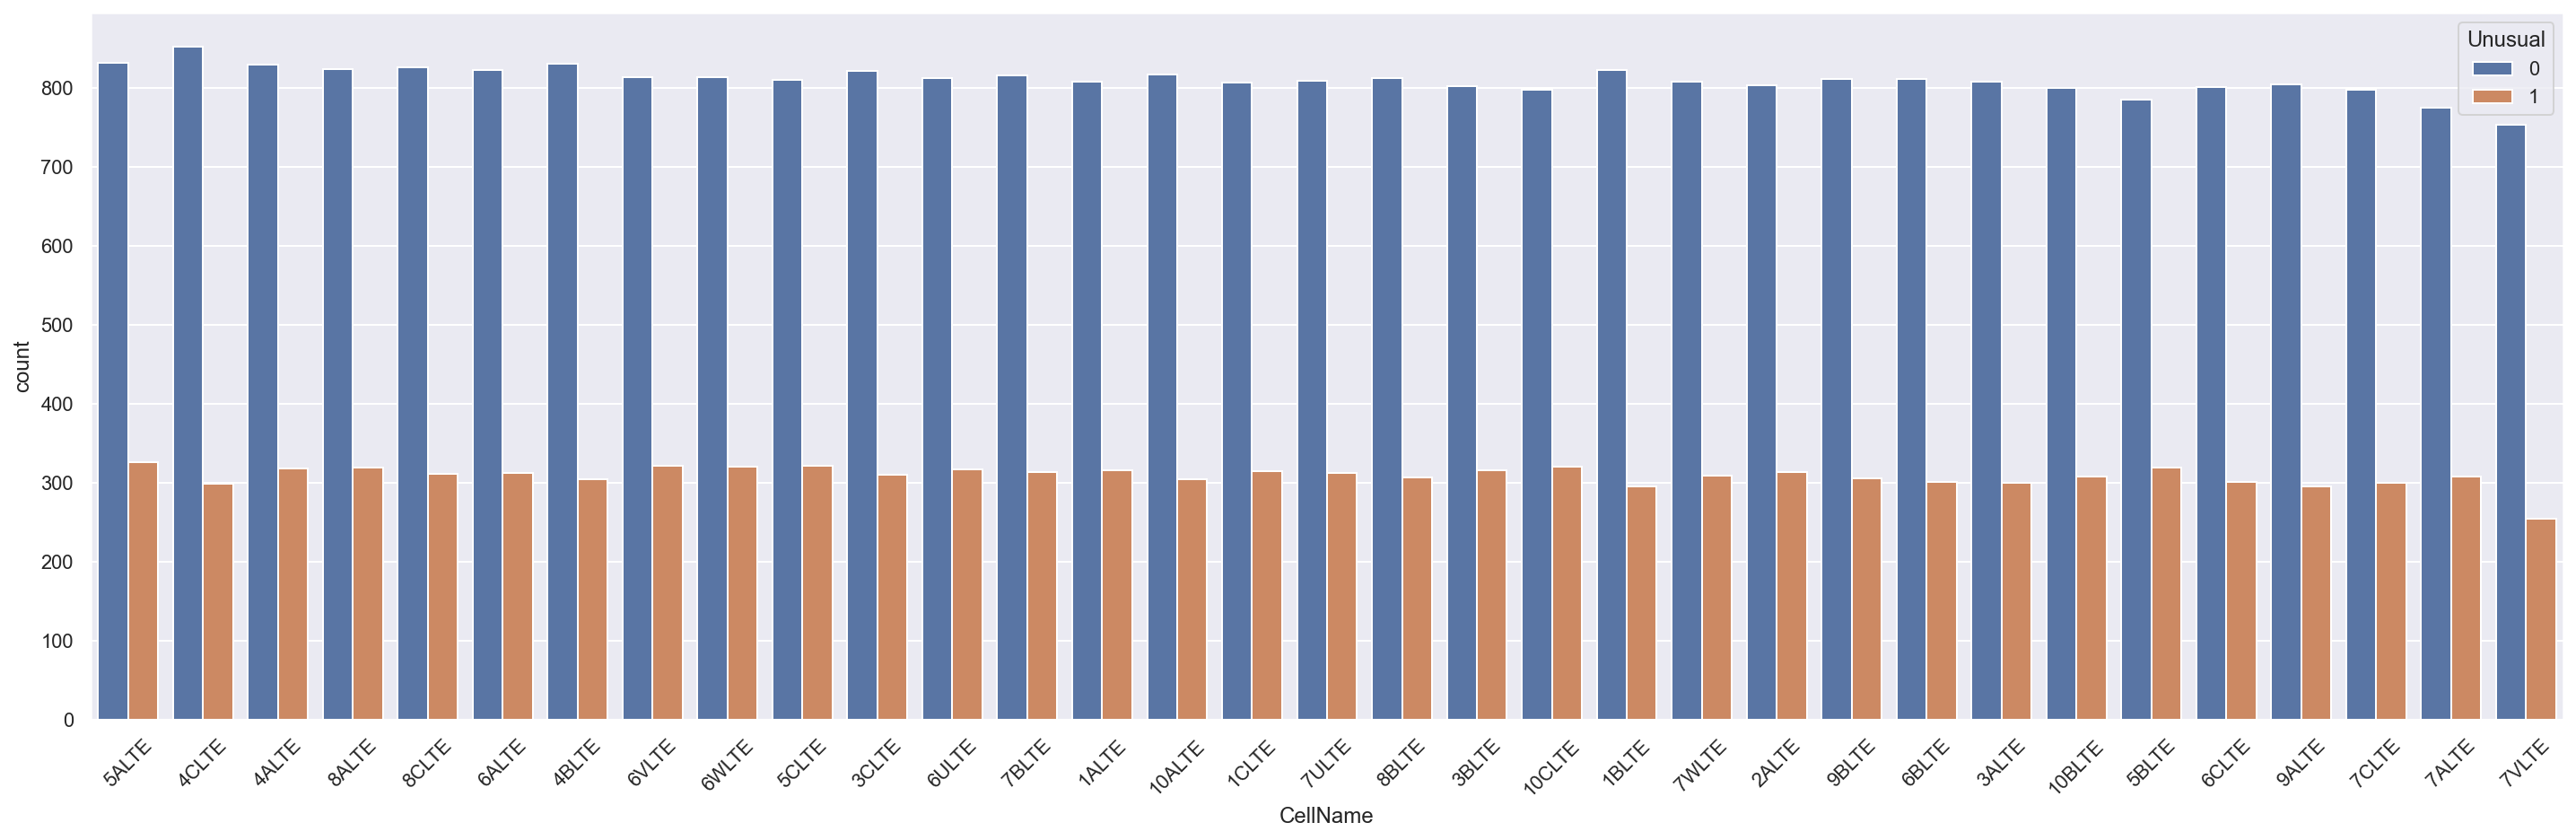

In [26]:
_cat_count_plot(train_df, 'CellName', 'Unusual')

**Numerical EDA**

In [27]:
# Use Median Values as this is generally a statistic more robust to outliers
numerical_data = train_df[['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                           'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL', 'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']]

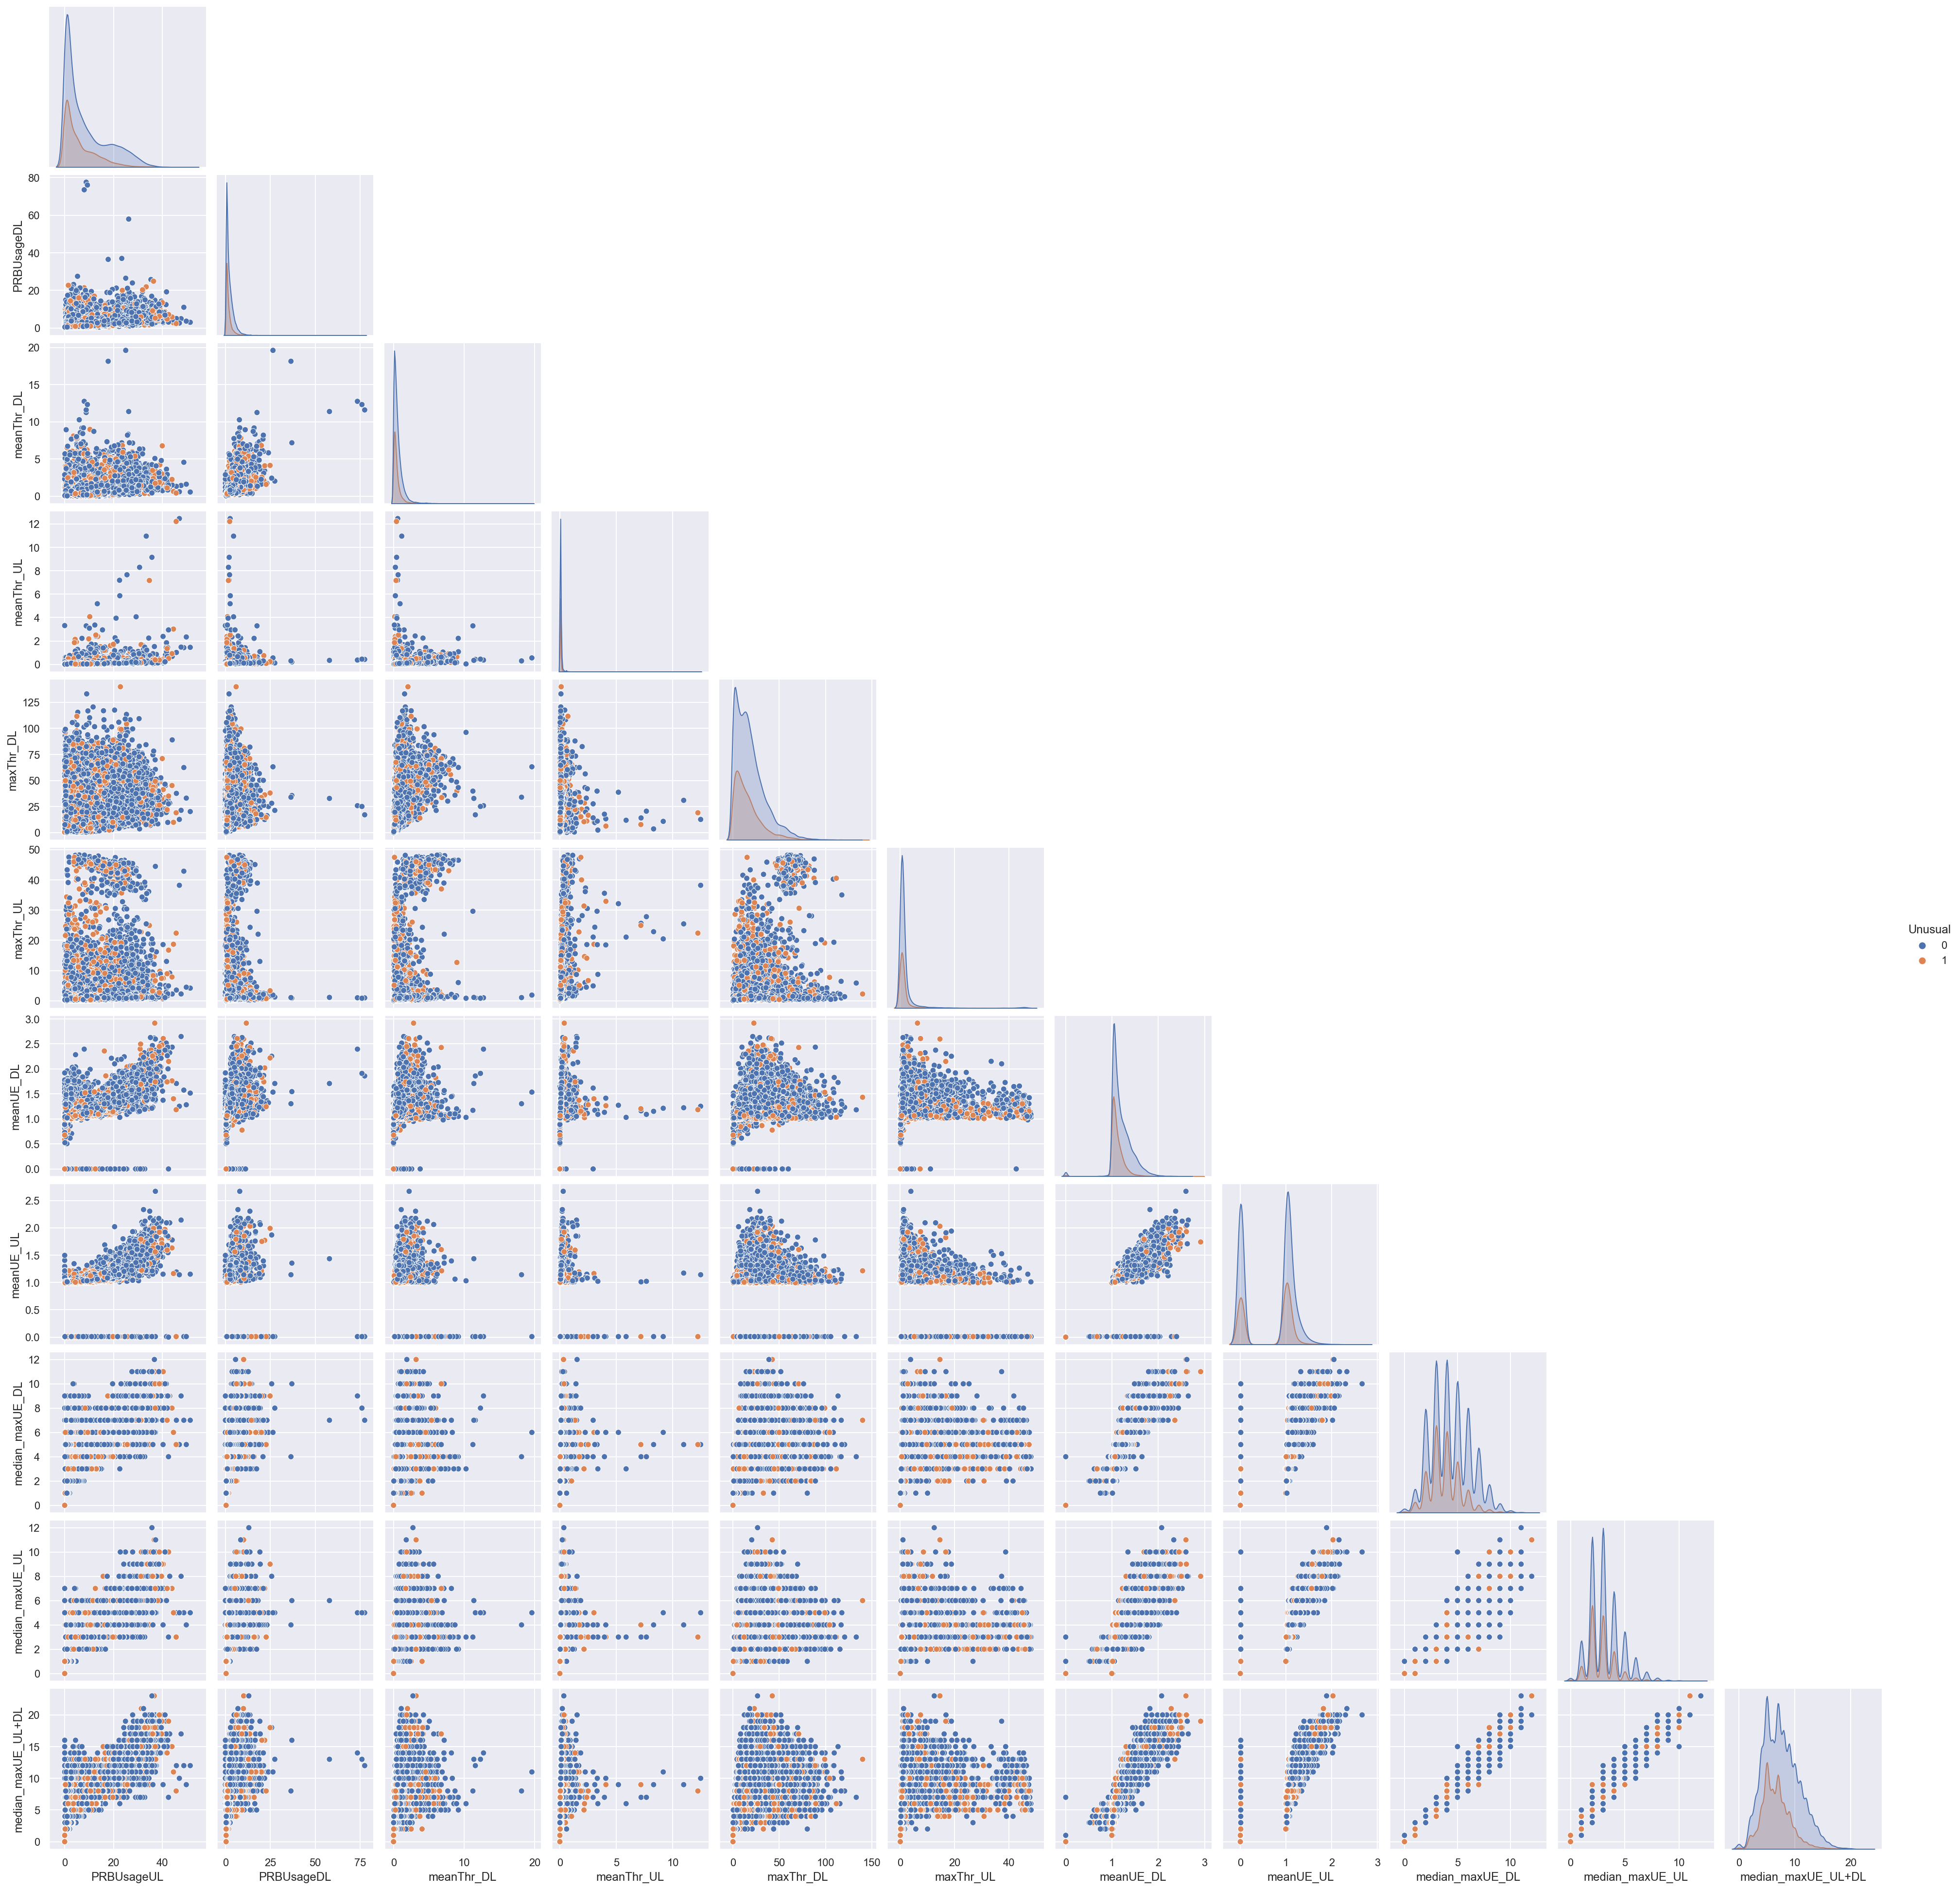

In [28]:
sns.pairplot(numerical_data, hue='Unusual', corner=True)

- Early indication that univariate approaches will no be sufficient for this project

## Anomaly Detection Algorithm Application
**How to use Statistics to Identify Outliers**
- Standard Deviation Method
- Interquartile Range Method
- Automatic Outlier Detection <br>
    - Elliptic Envelope

**Reference** <br>
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ <br>
https://medium.com/swlh/anomaly-detection-techniques-part-1-962b0494f9cf <br>
https://towardsdatascience.com/use-the-isolated-forest-with-pyod-3818eea68f08 <br>

Standard Deviation (Z-Score & Modified Z-Score) Method

In [28]:
# Normality Statistical Distribution Tests 
## Shapiro-Wilk Test / D’Agostino’s K^2 Test / Anderson-Darling Test
from numpy.random import seed
from scipy.stats import shapiro
from scipy.stats import normaltest

def _GaussianDist_Test(data, Normal_Test):
    
    seed(1)
    
    normal_data_test = data
    univariate_cols = data.select_dtypes('float').columns
    
    for i in univariate_cols:
        print('Column: ', i)
        data = normal_data_test[i]
        
        # normality test
        if(Normal_Test == 'shapiro'):
            ''' Evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution: The test may be suitable for smaller samples of data '''
            stat, p = shapiro(data)
            
        elif(Normal_Test == 'D_AgostinoIK_sq'):
            ''' Calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution '''
            stat, p = normaltest(data)
            
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print("""""")

In [29]:
_GaussianDist_Test(numerical_data, 'shapiro')
_GaussianDist_Test(numerical_data, 'D_AgostinoIK_sq')

Column:  PRBUsageUL
Statistics=0.836, p=0.000
Sample does not look Gaussian (reject H0)

Column:  PRBUsageDL
Statistics=0.675, p=0.000
Sample does not look Gaussian (reject H0)

Column:  meanThr_DL
Statistics=0.640, p=0.000
Sample does not look Gaussian (reject H0)

Column:  meanThr_UL
Statistics=0.174, p=0.000
Sample does not look Gaussian (reject H0)

Column:  maxThr_DL
Statistics=0.882, p=0.000
Sample does not look Gaussian (reject H0)

Column:  maxThr_UL
Statistics=0.285, p=0.000
Sample does not look Gaussian (reject H0)

Column:  meanUE_DL
Statistics=0.809, p=0.000
Sample does not look Gaussian (reject H0)

Column:  meanUE_UL
Statistics=0.740, p=0.000
Sample does not look Gaussian (reject H0)

Column:  median_maxUE_DL
Statistics=0.958, p=0.000
Sample does not look Gaussian (reject H0)

Column:  median_maxUE_UL
Statistics=0.907, p=0.000
Sample does not look Gaussian (reject H0)

Column:  median_maxUE_UL+DL
Statistics=0.968, p=0.000
Sample does not look Gaussian (reject H0)

Column:

- Given there is no clear distinction between inliers and outliers in the data set from the paris plot and the variables are not normally distributed the implementation of this univariate outlier detecton method is not sufficient for the data set

Interquartile Range Method (Univariate Outlier Detection Methods)

(0.0, 51.333)

Text(0, 0.5, 'PRBUsageUL / Unit')

(0.0, 77.505)

Text(0, 0.5, 'PRBUsageDL / Unit')

(0.0, 19.601)

Text(0, 0.5, 'meanThr_DL / Unit')

(0.0, 12.460999999999999)

Text(0, 0.5, 'meanThr_UL / Unit')

(0.0, 140.00799999999998)

Text(0, 0.5, 'maxThr_DL / Unit')

(0.0, 48.253)

Text(0, 0.5, 'maxThr_UL / Unit')

(0.0, 2.915)

Text(0, 0.5, 'meanUE_DL / Unit')

(0.0, 2.668)

Text(0, 0.5, 'meanUE_UL / Unit')

(0.0, 12.0)

Text(0, 0.5, 'median_maxUE_DL / Unit')

(0.0, 12.0)

Text(0, 0.5, 'median_maxUE_UL / Unit')

(0.0, 23.0)

Text(0, 0.5, 'median_maxUE_UL+DL / Unit')

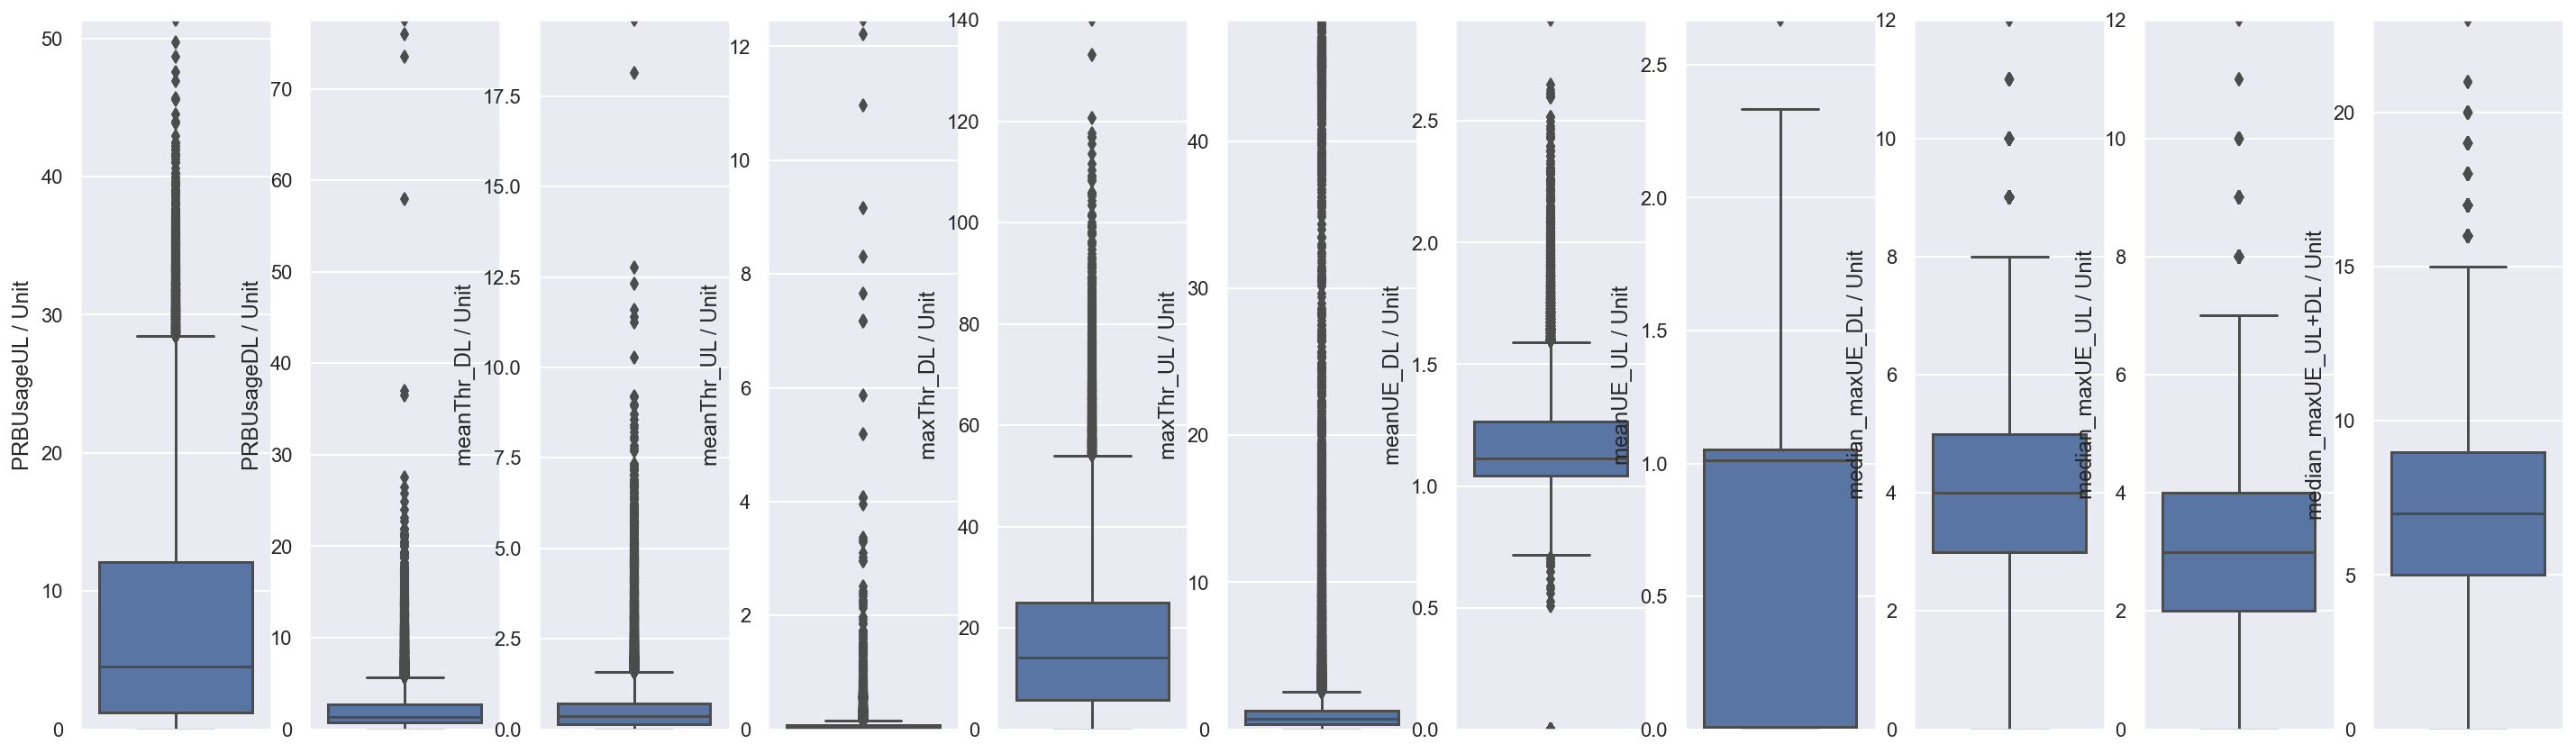

In [30]:
# create boxplot with a different y scale for different rows
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(22, 6.75)})


selection = numerical_data.select_dtypes('float').columns
fig, axes = plt.subplots(1, len(selection))
for i, col in enumerate(selection):
    ax = sns.boxplot(y=numerical_data[col], ax=axes.flatten()[i])
    ax.set_ylim(numerical_data[col].min(), numerical_data[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.show()

In [31]:
from scipy.stats import iqr

datapoints = numerical_data
univariate_cols = numerical_data.columns.drop('Unusual')

for i in univariate_cols:
    print(i)
    
    # calculate IQR -25th(Q1) and 75th(Q3) percentile of the datapoints 
    q1, q3= np.percentile(datapoints[i],[25,75])
    #Lower and upper bound for the outliers
    lower_bound = q1 - (1.5 * iqr(datapoints[i])) 
    upper_bound = q3 + (1.5 * iqr(datapoints[i]))
    print("Outliers for the data points", i, " are any point between",  lower_bound, " and " , upper_bound)
    
    numerical_data[i+'_IQR_Method'] = np.where((datapoints[i] < lower_bound) | (datapoints[i] > upper_bound), 'IQR_Outlier', 'IQR_Inlier')
    print(numerical_data[i+'_IQR_Method'].value_counts())
    print("""""")

PRBUsageUL
Outliers for the data points PRBUsageUL  are any point between -15.156500000000001  and  28.4955
IQR_Inlier     35880
IQR_Outlier     1024
Name: PRBUsageUL_IQR_Method, dtype: int64

PRBUsageDL
Outliers for the data points PRBUsageDL  are any point between -2.3244999999999996  and  5.7595
IQR_Inlier     34624
IQR_Outlier     2280
Name: PRBUsageDL_IQR_Method, dtype: int64

meanThr_DL
Outliers for the data points meanThr_DL  are any point between -0.727  and  1.585
IQR_Inlier     34653
IQR_Outlier     2251
Name: meanThr_DL_IQR_Method, dtype: int64

meanThr_UL
Outliers for the data points meanThr_UL  are any point between -0.059999999999999984  and  0.15599999999999997
IQR_Inlier     34594
IQR_Outlier     2310
Name: meanThr_UL_IQR_Method, dtype: int64

maxThr_DL
Outliers for the data points maxThr_DL  are any point between -23.312375  and  54.082625
IQR_Inlier     35542
IQR_Outlier     1362
Name: maxThr_DL_IQR_Method, dtype: int64

maxThr_UL
Outliers for the data points maxThr_U

In [32]:
IQR_cols = numerical_data.columns[numerical_data.columns.str.contains('_IQR_Method')]
IQR_Data = numerical_data[IQR_cols]
IQR_Data = pd.concat([IQR_Data, IQR_Data.apply(pd.Series.value_counts, axis=1).fillna(0)], axis=1) # Maybe use pd.merge by index to avoid error

In [33]:
IQR_Data['Ratio'] = IQR_Data['IQR_Inlier']/(IQR_Data['IQR_Outlier'] + IQR_Data['IQR_Inlier'])
#IQR_Data#.sort_values('Ratio', ascending=True)

## Automatic & Multivariate Outlier Detection Methods

**References** <br>
https://medium.com/swlh/anomaly-detection-techniques-part-1-962b0494f9cf <br>

Automatic & Multivariate Outlier Detection Methods: Elliptic Envelope (Minimum Covariance Determinant)
- The Elliptic Envelope is a **supervised as well as unsupervised algorithm** to model the data as a **high dimensional data Gaussian distribution with possible covariance between features**
- It then finds an Elliptical boundary that contains most of the data points and anything outside the elliptical boundary is an Outlier
- Intuitively built on the premise that **data comes from a known distribution**
- Outlier detection from covariance estimation may break or not perform well in high-dimensional settings. In particular, one will always take care to work with ``n_samples > n_features ** 2``
- The most important parameter in defining the model is to set the “contamination” parameter, which basically defines the proportion of values that will be identified as outliers. The parameter value ranges between 0 and 0.5
- If we draw an ellipse around the gaussian distribution of data, anything that lies outside the ellipse will be considered an outlier.
- Elliptic Envelope in the supervised model requires the **target variable to be set to 1 for inliers and a value of -1 for the outlier**

In [80]:
# Determine data
def _create_model_data(data):
    
    model_data = numerical_data.copy()
    
    univariate_cols = ['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                   'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL',
                   'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']
    
    model_data = model_data[univariate_cols]
    
    return model_data


def _update_target_labels(data):
    
    ''' The EllipticEnvelope algorithm required a transformed target to be set to 1 for inliers and a value of -1 for the outlier '''
    
    data.loc[data['Unusual'] == 0, 'target'] = 1
    data.loc[data['Unusual'] == 1, 'target'] = -1
    
    label = pd.DataFrame(data['Unusual'])
    
    return data.drop(columns='Unusual', axis=1, inplace=True)


def _determine_y(data):
    
    ''' Create a vector y as the target for the model '''
    
    return data['target']


def _determine_X(data):
    
    ''' Determine the features X that should be used as input variables to the model '''
    
    return data[['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL', 'median_maxUE_UL', 'median_maxUE_UL+DL']]


def _ln_transform_X(data):
    
    ''' EllipticEnvelope requires normally distributed data to develop Gaussian Elliptics decision boundaries: Attempt ln transform to achieve Normal Distrubted Data '''
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    for c in [c for c in data.columns.drop('target') if data[c].dtype in numerics]:
        data[c+'_ln_trans'] = np.sqrt(data[c]**2)
        data[c+'_ln_trans'] = np.log(data[c+'_ln_trans'] + 1)
        
    logtrans_cols = data.columns[data.columns.str.contains('_ln_trans')]
    X_logtrans = data[logtrans_cols]
    
    return X_logtrans


def _establish_train_test_split(X, y, split=0.3):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=2021)
    
    return X_train, X_test, y_train, y_test


def _fit_model(X_train, y_train, X_test, model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred


def _add_results_df(X_test, y_test, y_preds, col_name):
    
    X_test['target'] = y_test
    X_test[col_name] = y_preds
    final_results = X_test.copy()
    
    
    return final_results 


def _evaluate_performance(final_results, col_name):
    
    cm=confusion_matrix(final_results['target'], final_results[col_name])
    print(" Accuracy Score for Elliptic Envelope :", accuracy_score(final_results['target'], final_results[col_name]))
    print(" Precision for Elliptic Envelope :", precision_score(final_results['target'], final_results[col_name]))
    print(" Recall for Elliptic Envelope :", recall_score(final_results['target'], final_results[col_name]))
    print(" Confusion Matrix: \n", cm)
    

def _implement_pca(X, n_comp=3):
    
    pca= PCA(n_components=n_comp)
    
    scaler= StandardScaler() # Scale the X Data Points
    X_scaled=scaler.fit_transform(X)
    X_reduced=pca.fit_transform(X_scaled)
    
    return X_reduced

def _establish_anomaly_index(final_results):
    
    original_anomaly_index=final_results.loc[final_results['target']==-1]
    original_anomaly_index=list(original_anomaly_index.index)
    
    return original_anomaly_index


def _produce_plots(X_reduced, original_anomaly_index, col_name):
    
    fig=plt.figure(figsize=(25, 5))
    ax= fig.add_subplot(131, projection='3d')
    
    ax.scatter(X_reduced[:,0],
               X_reduced[:,1], 
               zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green", marker="o")
    
    ax.scatter(X_reduced[original_anomaly_index,0],
               X_reduced[original_anomaly_index,1], 
               zs=X_reduced[original_anomaly_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
    ax.legend(loc='lower left')
    plt.title('Outliers on Original scaled data')

    ax= fig.add_subplot(133, projection='3d')
    plt.title(f'Outliers using ')
    ax.scatter(X_reduced[:,0],
               X_reduced[:,1], 
               zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green")
    ax.scatter(X_reduced[col_name,0],
               X_reduced[col_name,1], 
               zs=X_reduced[col_name,2], lw=2, s=60, marker="x", c="red", label="outliers")
    ax.legend()
    
    plt.show()
    
# Normal Distribution Tests
#_GaussianDist_Test(X_logtrans, 'shapiro')
#_GaussianDist_Test(numerical_data, 'D_AgostinoIK_sq')
#X_logtrans.hist()
#elliptic_envelope_data.hist()

In [81]:
model_data = _create_model_data(numerical_data)
_update_target_labels(model_data)

y = _determine_y(model_data)
X = _determine_X(model_data)
X_logtrans = _ln_transform_X(model_data)

In [82]:
X_train, X_test, y_train, y_test = _establish_train_test_split(X, y)

In [83]:
model_ee = EllipticEnvelope(contamination=0.1)
y_preds = _fit_model(X_train, y_train, X_test, model_ee)

In [84]:
final_results = _add_results_df(X_test, y_test, y_preds, 'y_preds_elliptic_env')

In [85]:
_evaluate_performance(final_results, 'y_preds_elliptic_env')

 Accuracy Score for Elliptic Envelope : 0.668804190751445
 Precision for Elliptic Envelope : 0.7175503658414353
 Recall for Elliptic Envelope : 0.893981018981019
 Confusion Matrix: 
 [[ 246 2818]
 [ 849 7159]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

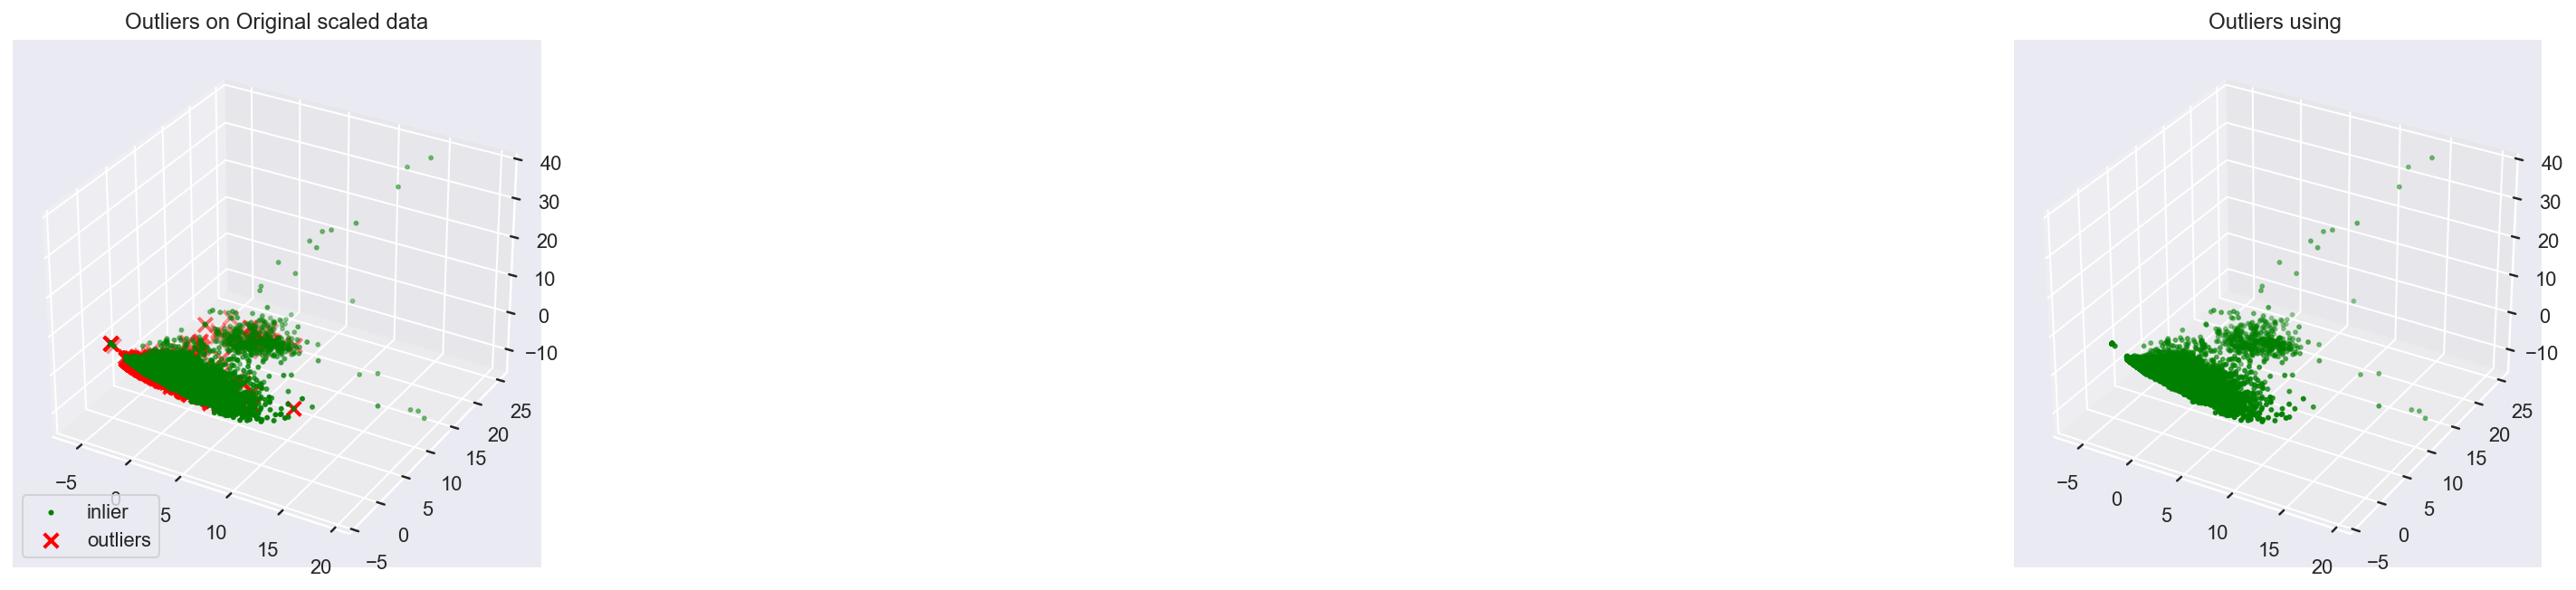

In [86]:
X_reduced = _implement_pca(X)
original_anomaly_index = _establish_anomaly_index(final_results)
_produce_plots(X_reduced, original_anomaly_index, 'y_preds_elliptic_env')

In [36]:
# elliptic_envelope_data = numerical_data.copy()

# univariate_cols = ['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
#                    'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL',
#                    'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']

# elliptic_envelope_data = elliptic_envelope_data[univariate_cols]

In [38]:
# _update_target_labels(elliptic_envelope_data)
# y = _determine_y(elliptic_envelope_data)
# X = _determine_X(elliptic_envelope_data)
# X_logtrans = _ln_transform_X(elliptic_envelope_data)

In [41]:
# #Creating train and test  data --- Add a step to scale the data due to working with distances 
# X_train, X_test, y_train, y_test = train_test_split(X_logtrans, y, test_size=0.3, random_state=2021)
# X_test = X_test.reset_index()
# X_train = X_train.reset_index()
# y_train = y_train.to_frame().reset_index()
# y_test = y_test.to_frame().reset_index()
# X_train.drop(columns='index', axis=1, inplace=True)
# X_test.drop(columns='index', axis=1, inplace=True)
# y_train.drop(columns='index', axis=1, inplace=True)
# y_test.to_frame().reset_index().drop(columns='index', axis=1, inplace=True)
# dataset_test= X_test.copy()
# dataset_test['target']=y_test
# model_ee.fit(X_train, y_train)
# y_pred_ee = model_ee.predict(X_test)
# X_test.head(2)
# cm=confusion_matrix(dataset_test['target'], dataset_test['ee_anomaly'])
# print(" Accuracy Score for Elliptic Envelope :", accuracy_score(dataset_test['target'], dataset_test['ee_anomaly']))
# print(" Precision for Elliptic Envelope :", precision_score(dataset_test['target'], dataset_test['ee_anomaly']))
# print(" Recall for Elliptic Envelope :", recall_score(dataset_test['target'], dataset_test['ee_anomaly']))
# print(" Confusion Matrix: \n", cm)
# original_anomaly_index=dataset_test.loc[dataset_test['target']==-1]
# original_anomaly_index=list(original_anomaly_index.index)

Text(0.5, 0.92, 'Outliers on Original scaled data')

Text(0.5, 0.92, 'Outliers using Elliptic Envelope')

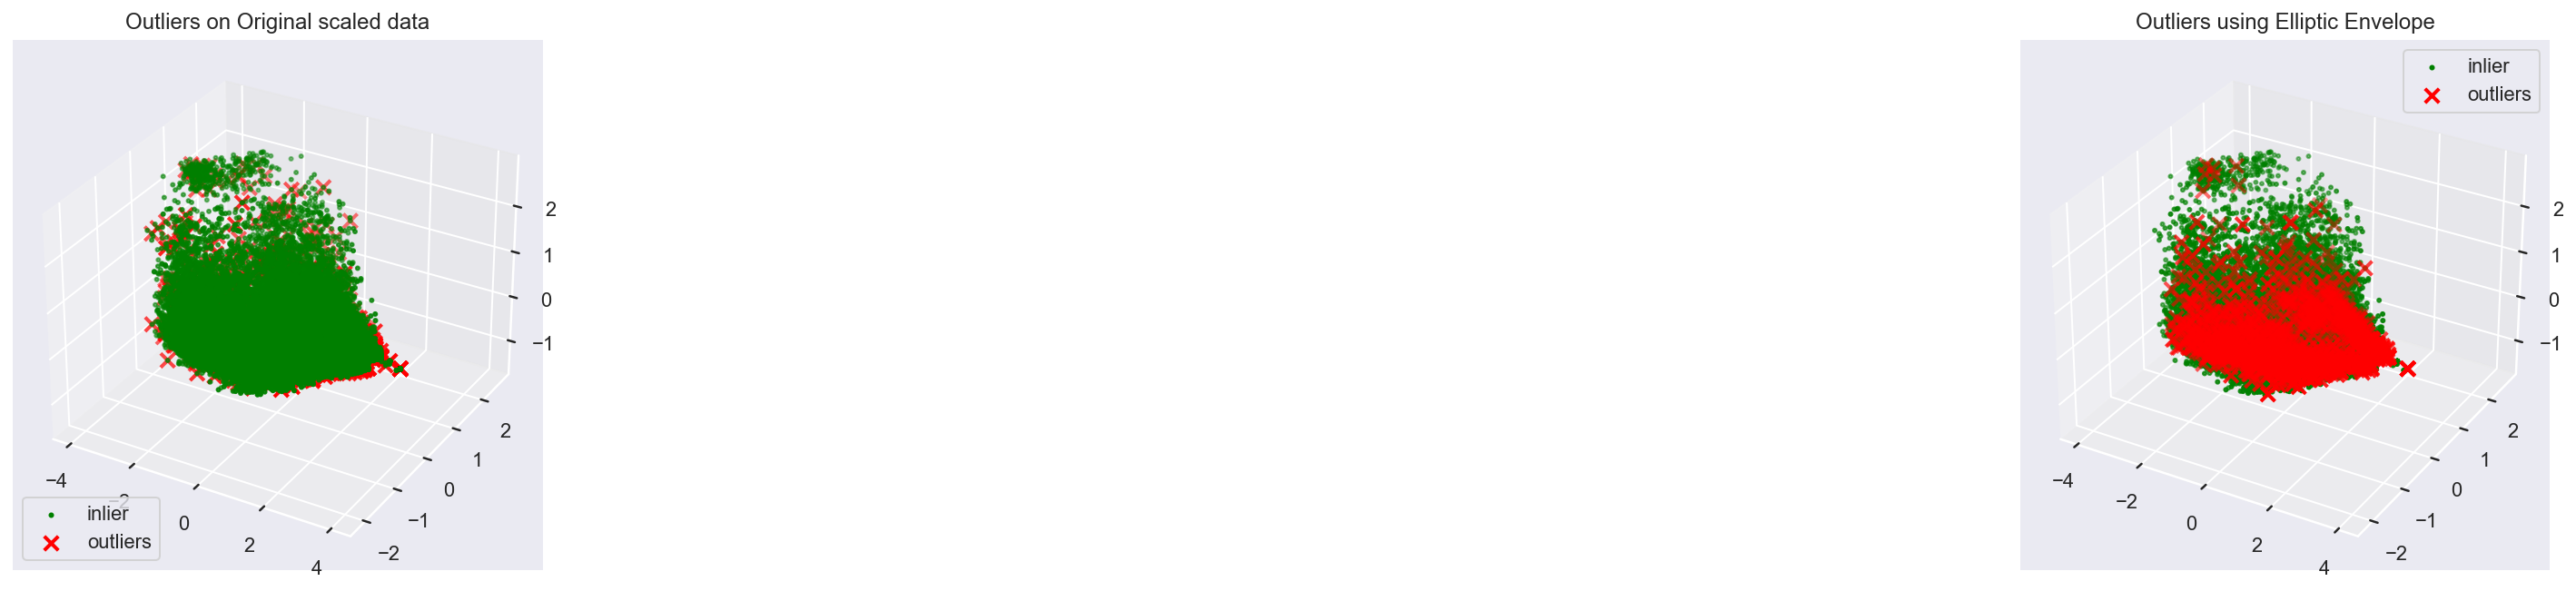

In [48]:
fig=plt.figure(figsize=(25, 5))

ax= fig.add_subplot(131, projection='3d')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green", marker="o")
ax.scatter(X_reduced[original_anomaly_index,0],X_reduced[original_anomaly_index,1], zs=X_reduced[original_anomaly_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend(loc='lower left')
plt.title('Outliers on Original scaled data')

ax= fig.add_subplot(133, projection='3d')
plt.title('Outliers using Elliptic Envelope')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green")
ax.scatter(X_reduced[ee_anom_index,0],X_reduced[ee_anom_index,1], zs=X_reduced[ee_anom_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()

Automatic & Multivariate Outlier Detection Methods: Isolation Forest & Extended Isolation Forest (not implemented) <br>
https://www.bmc.com/blogs/outlier-and-anomaly-detection/ <br>
https://towardsdatascience.com/outlier-detection-with-extended-isolation-forest-1e248a3fe97b?source=email-99e2db4dbbed-1618365452367-digest.reader-7f60cf5620c9-1e248a3fe97b----0-59------------------f0426ce9_6de4_45f9_841f_945e052e24b9-1-fab4eada_8319_4ab6_9e6b_b880310bf583 <br>
https://towardsdatascience.com/outlier-detection-with-extended-isolation-forest-1e248a3fe97b <br>
https://blog.paperspace.com/anomaly-detection-isolation-forest/#:~:text=machine%20learning%20is.-,What%20Is%20Isolation%20Forest%3F,on%20the%20Decision%20Tree%20algorithm. <br>
https://towardsdatascience.com/isolation-forest-from-scratch-e7e5978e6f4c <br>

- **Unsupervised** machine learning algorithm for identifying anomalies within a dataset by isolating anomalies as they are few and different
- Not restricted by the assumption of Gaussian Distributed Data and This algorithm works very well with a small data set as well.
- The Isolation forest isolates the observation by applying a recursive partition to randomly select a feature and then randomly select a split value between the minimum and maximum value for the selected feature
- Test/Assertion: The normalised proportion of value counts should equate back to the selected contamination of the algorithm
- Key parameters for Isolation forest
    - n_estimators: number of base estimators in the ensemble. default is 100
    - contamination: the amount of contamination of the data set, which is the number of outliers in the dataset. The contamination range can be between [0, 0.5]. By default, the value is set to auto.
    - The decision_function() gives the score for the anomalies. We can apply a threshold value to the score to decide if a data point is anomalous or not.
    - The Anamoly score also can be used for identifying anomalous data points. A negative score and a value of -1 for the anomaly columns indicate the presence of an anomaly. A positive score and a value of 1 for the anomaly column represents the normal data.
- Extended Isolation Forest (EIF), which addresses major drawbacks of the original method
    - IF can create 'ghost' clusters - These are regions of no data points but the algorithm determines that a cluster exists with multivariate data. The reason for this peculiar behavior originates from the fact that the decision boundaries of the Isolation Forest are either vertical or horizontal (random value of a random feature
    - Extended Random Forest generalizes well into higher dimensions, where instead of straight lines we are dealing with hyperplanes avoiding the creation of ghost clusters 

<img src="/Users/Rej1992/Documents/GitHub/AnomalieDetectionMethods/docs/GhostClusters_IsolationForest.png">

In [49]:
isolation_forest_data = numerical_data.copy()

univariate_cols = ['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                   'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL',
                   'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']

isolation_forest_data = isolation_forest_data[univariate_cols]

In [50]:
X = _determine_X(isolation_forest_data) # No need to determine y as the model us unsupervised
y = isolation_forest_data['Unusual']

In [51]:
#Creating train ans test  data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=2021)
# Reseting the ndex and dropping the index column
X_test = X_test.reset_index()
X_train = X_train.reset_index()
X_train.drop(columns='index', axis=1, inplace=True)
X_test.drop(columns='index', axis=1, inplace=True)
y_train = y_train.to_frame().reset_index()
y_test = y_test.to_frame().reset_index()
#Createing test dataframe
dataset_test= X_test

In [52]:
model = IsolationForest(n_estimators=100,random_state=2021, max_samples='auto', contamination=.3)
y_pred_train = model.fit(X_train)

In [53]:
y_pred_train

IsolationForest(contamination=0.3, random_state=2021)

In [54]:
y_pred=model.predict(X_test)
dataset_test['if_scores']=model.decision_function(X_test)
dataset_test.head(2)

PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  maxThr_UL  \
0       2.526       2.324       0.381       0.072     10.141      2.340   
1       9.095       0.707       0.131       0.025     10.435      0.504   

   meanUE_DL  meanUE_UL  median_maxUE_DL  median_maxUE_UL  median_maxUE_UL+DL  \
0      1.374      0.010              7.0              3.0                10.0   
1      1.112      1.021              4.0              3.0                 7.0   

   if_scores  
0  -0.005745  
1   0.052959

In [55]:
dataset_test['Unusual'] = y_test['Unusual']
dataset_test['if_anomaly']=list(y_pred)

In [56]:
_update_target_labels(dataset_test)

In [57]:
dataset_test

PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  maxThr_UL  \
0           2.526       2.324       0.381       0.072     10.141      2.340   
1           9.095       0.707       0.131       0.025     10.435      0.504   
2           0.303       0.808       0.033       0.011      1.505      0.093   
3           1.791       0.498       0.049       0.012      5.109      0.221   
4           2.425       3.537       0.368       0.061     12.498      1.938   
...           ...         ...         ...         ...        ...        ...   
11067       1.415       3.335       0.537       0.043     24.668      0.559   
11068      16.370       6.063       1.356       0.108     34.960      0.931   
11069      16.716       2.388       0.528       0.082     25.506      0.820   
11070      17.381       0.808       0.261       0.024      9.549      0.419   
11071       1.791       3.781       0.459       0.052     11.194      0.697   

       meanUE_DL  meanUE_UL  median_maxUE_DL  median_maxUE_UL  \
0          1.374      0.010              7.0              3.0   
1          1.112      1.021              4.0              3.0   
2          1.041      0.010              3.0              2.0   
3          1.005      1.005              3.0              2.0   
4          1.324      0.010              7.0              3.0   
...          ...        ...              ...              ...   
11067      1.172      0.010              4.0              3.0   
11068      1.475      1.112              7.0              4.0   
11069      1.264      1.204              7.0              5.0   
11070      1.091      1.031              4.0              3.0   
11071      1.333      0.010              6.0              3.0   

       median_maxUE_UL+DL  if_scores  if_anomaly  target  
0                    10.0  -0.005745          -1     1.0  
1                     7.0   0.052959           1     1.0  
2                     5.0   0.044810           1     1.0  
3                     5.0   0.047783           1    -1.0  
4                    10.0   0.000281           1     1.0  
...                   ...        ...         ...     ...  
11067                 7.0   0.038512           1     1.0  
11068                11.0  -0.040939          -1     1.0  
11069                12.0  -0.013152          -1    -1.0  
11070                 7.0   0.031991           1     1.0  
11071                 9.0   0.022635           1    -1.0  

[11072 rows x 14 columns]

In [58]:
cm=confusion_matrix(dataset_test['target'], dataset_test['if_anomaly'])
print(" Accuracy Score for Isolation Forest :", accuracy_score(dataset_test['target'], dataset_test['if_anomaly']))
print(" Precision for Isolation Forest :", precision_score(dataset_test['target'], dataset_test['if_anomaly']))
print(" Recall for Isolation Forest :", recall_score(dataset_test['target'], dataset_test['if_anomaly']))
print(" Confusion Matrix: \n", cm)

 Accuracy Score for Isolation Forest : 0.546875
 Precision for Isolation Forest : 0.6950567366636233
 Recall for Isolation Forest : 0.6654595404595405
 Confusion Matrix: 
 [[ 726 2338]
 [2679 5329]]


In [59]:
# Plotting a 3-D plot for inliers and outliers
pca= PCA(n_components=3)
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)
X_reduced=pca.fit_transform(X)

In [60]:
predicted_anomaly_index=dataset_test.loc[dataset_test['if_anomaly']==-1]
predicted_anomaly_index=list(predicted_anomaly_index.index)
original_anomaly_index=dataset_test.loc[dataset_test['target']==-1]
original_anomaly_index=list(original_anomaly_index.index)

Text(0.5, 0.92, 'Outliers on Original scaled data')

Text(0.5, 0.92, 'Outliers using Isolation Forest')

Text(0.5, 0.92, 'Outliers using Elliptic Envelope')

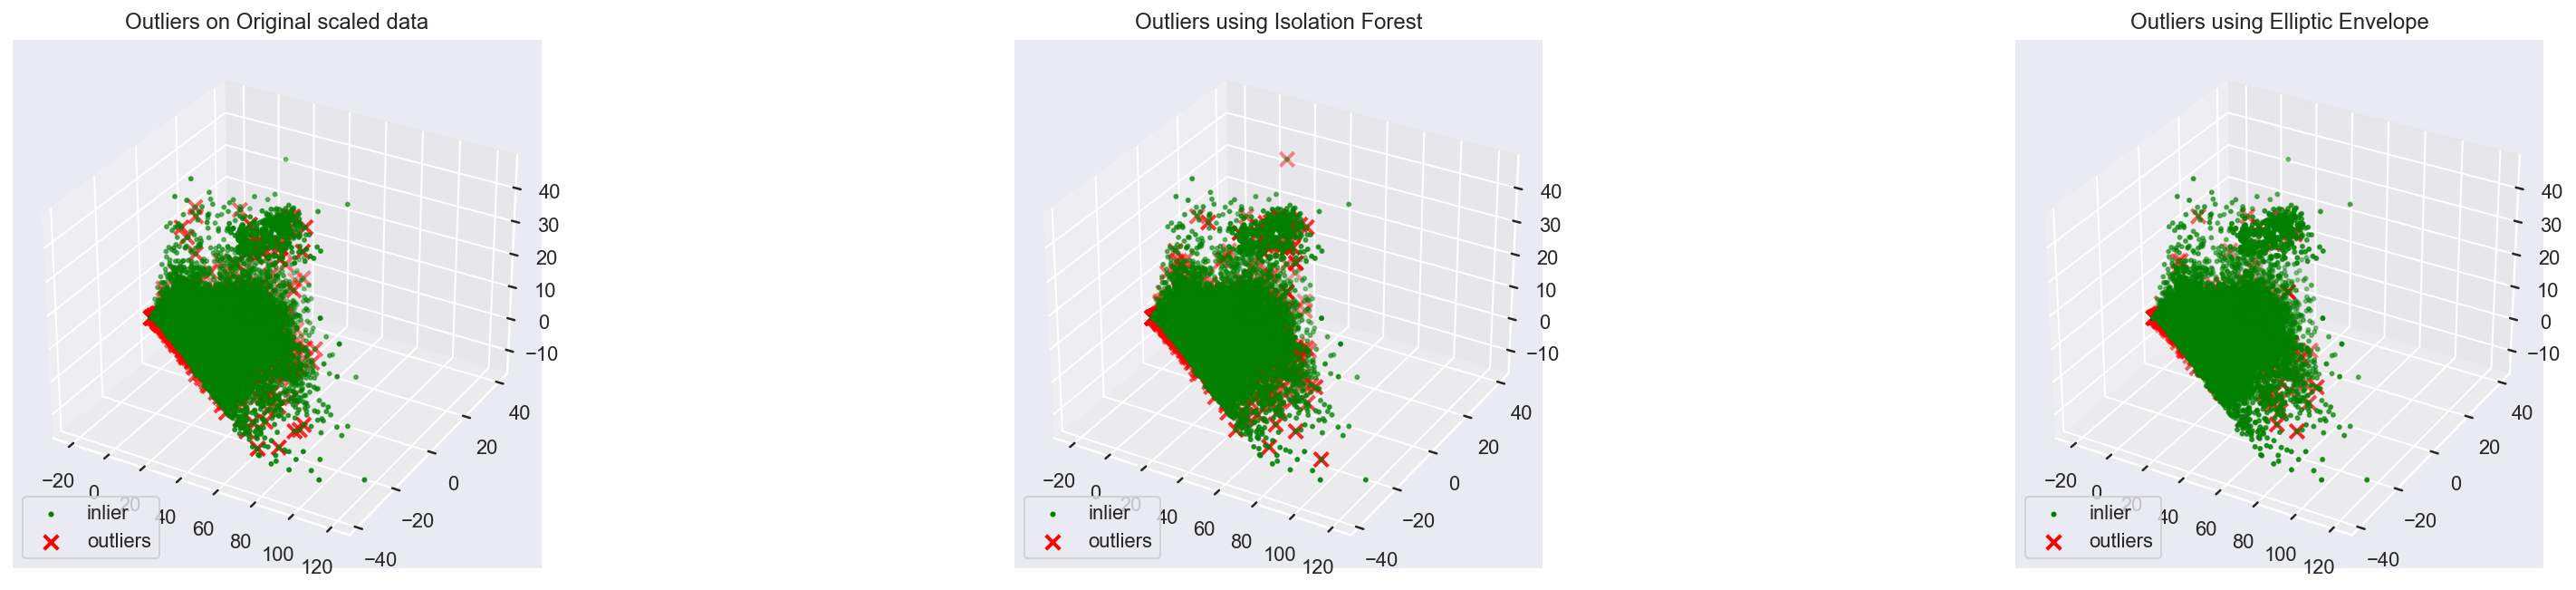

In [61]:
fig=plt.figure(figsize=(25, 5))

ax= fig.add_subplot(131, projection='3d')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green", marker="o")
ax.scatter(X_reduced[original_anomaly_index,0],X_reduced[original_anomaly_index,1], zs=X_reduced[original_anomaly_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend(loc='lower left')
plt.title('Outliers on Original scaled data')

ax= fig.add_subplot(132, projection='3d')
plt.title('Outliers using Isolation Forest')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green", marker="o")
ax.scatter(X_reduced[predicted_anomaly_index,0],X_reduced[predicted_anomaly_index,1], zs=X_reduced[predicted_anomaly_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend(loc='lower left')

ax= fig.add_subplot(133, projection='3d')
plt.title('Outliers using Elliptic Envelope')
ax.scatter(X_reduced[:,0],X_reduced[:,1], zs=X_reduced[:,2], s=4, lw=1, label='inlier', c="green")
ax.scatter(X_reduced[ee_anom_index,0],X_reduced[ee_anom_index,1], zs=X_reduced[ee_anom_index,2], lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend(loc='lower left')
plt.show()

Automatic & Multivariate Outlier Detection Methods: DBSCAN

In [62]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
dbscan_data = numerical_data.copy()

univariate_cols = ['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                   'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL',
                   'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']

dbscan_data = dbscan_data[univariate_cols]

In [64]:
X = _determine_X(dbscan_data) # No need to determine y as the model us unsupervised
y = dbscan_data['Unusual']

In [65]:
X, labels_true = StandardScaler().fit_transform(X), y

Estimated number of clusters: 18
Estimated number of noise points: 21513
Homogeneity: 0.011
Completeness: 0.004
V-measure: 0.006
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.006
Silhouette Coefficient: -0.081


Text(0.5, 1.0, 'Estimated number of clusters: 18')

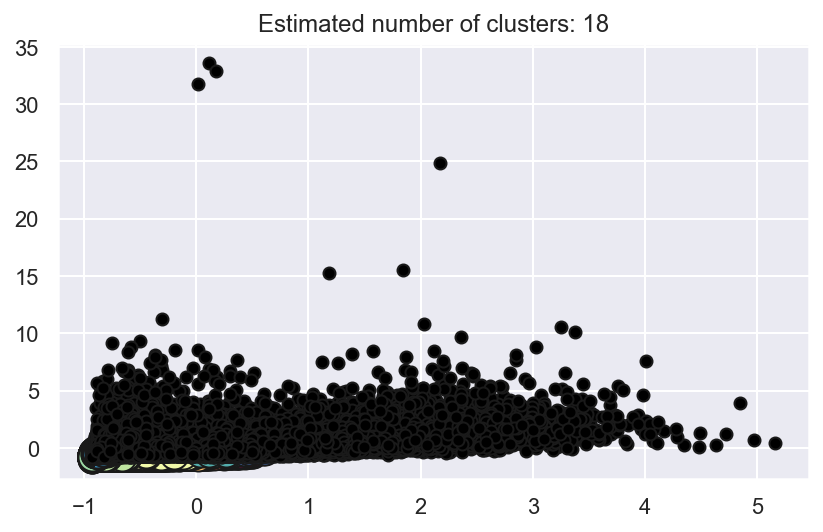

In [67]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# These metric is not symmetric: switching label_true with label_pred will return the homogeneity_score (and vice versa) which will be different in general.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) # A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels)) # The V-measure is the harmonic mean between homogeneity and completeness
 
# The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters 
# in the predicted and true clusterings. The raw RI score is then “adjusted for chance” into the ARI score
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))

# Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two 
# clusterings with a larger number of clusters, regardless of whether there is actually more information shared. (can be slow to fit than other cluster metrics)
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

# Determines the sepatation between clusters: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [68]:
# Pull Agorithm Results together into a final DF
numerical_data['DBSCAN_Method'] = np.where(labels == -1, 'DBSCAN_Outlier', 'DBSCAN_Inlier')
numerical_data['DBSCAN_Method_Result'] = np.where(labels == -1, 1, 0)

In [69]:
pd.crosstab(numerical_data.Unusual, numerical_data.DBSCAN_Method)

cm=confusion_matrix(numerical_data['Unusual'], numerical_data['DBSCAN_Method_Result'])
print(" Accuracy Score for DBSCAN :", accuracy_score(numerical_data['Unusual'], numerical_data['DBSCAN_Method_Result']))
print(" Precision for DBSCAN :", precision_score(numerical_data['Unusual'], numerical_data['DBSCAN_Method_Result']))
print(" Recall for DBSCAN :", recall_score(numerical_data['Unusual'], numerical_data['DBSCAN_Method_Result']))
print(" Confusion Matrix: \n", cm)

DBSCAN_Method  DBSCAN_Inlier  DBSCAN_Outlier
Unusual                                     
0                      10462           16259
1                       4929            5254

 Accuracy Score for DBSCAN : 0.4258616952091914
 Precision for DBSCAN : 0.24422442244224424
 Recall for DBSCAN : 0.5159579691642935
 Confusion Matrix: 
 [[10462 16259]
 [ 4929  5254]]


Automatic & Multivariate Outlier Detection Methods: Local Outlier Factor
- The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.
- When a point is considered as an outlier based on its local neighborhood, it is a local outlier. LOF will identify an outlier considering the density of the neighborhood. LOF performs well when the density of the data is not the same throughout the dataset.
- Four Key Calculations:
    - K-Distance & K-Neighbours
    - Reachability Distance
    - Local reachability density
    - Local Outlier Factor
- **It gives better results than the global approach to find outliers**. Since there is no threshold value of LOF, the selection of a point as an outlier is user-dependent.<br>
https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843 <br>
https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe <br>
https://www.sciencedirect.com/topics/computer-science/local-outlier-factor

In [70]:
from sklearn.neighbors import LocalOutlierFactor

In [71]:
LOF_data = numerical_data.copy()

univariate_cols = ['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                   'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL',
                   'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']

LOF_data = LOF_data[univariate_cols]

In [72]:
X = _determine_X(LOF_data) 
y = dbscan_data['Unusual']

In [73]:
clf = LocalOutlierFactor(n_neighbors=5)
LOF_preds = clf.fit_predict(X)
clf.negative_outlier_factor_

array([-1.00269827, -1.1144261 , -1.29950943, ..., -1.03576348,
       -1.04257477, -0.96403712])

In [74]:
# Pull Agorithm Results together into a final DF
numerical_data['LOF_Method'] = np.where(LOF_preds == -1, 'LOF_Outlier', 'LOF_Inlier')
numerical_data['LOF_Method_Result'] = np.where(LOF_preds == -1, 1, 0)

In [75]:
pd.crosstab(numerical_data.Unusual, numerical_data.LOF_Method)

cm=confusion_matrix(numerical_data['Unusual'], numerical_data['LOF_Method_Result'])
print(" Accuracy Score for LOF :", accuracy_score(numerical_data['Unusual'], numerical_data['LOF_Method_Result']))
print(" Precision for LOF :", precision_score(numerical_data['Unusual'], numerical_data['LOF_Method_Result']))
print(" Recall for LOF :", recall_score(numerical_data['Unusual'], numerical_data['LOF_Method_Result']))
print(" Confusion Matrix: \n", cm)

LOF_Method  LOF_Inlier  LOF_Outlier
Unusual                            
0                25507         1214
1                 9725          458

 Accuracy Score for LOF : 0.7035822675048775
 Precision for LOF : 0.27392344497607657
 Recall for LOF : 0.044976922321516254
 Confusion Matrix: 
 [[25507  1214]
 [ 9725   458]]


**One-Class Support Vector Machines** <br>
https://machinelearningmastery.com/one-class-classification-algorithms/ <br>
https://towardsdatascience.com/support-vector-machine-svm-for-anomaly-detection-73a8d676c331 <br>
- A one-class classifier is fit on a training dataset that only has examples from the normal class
- The model on the input examples from the majority class in the training set. The model is then used to classify examples in the test set as inliers and outliers
- Good results with severe class imbalance and considered as a one versus all approach
- The main difference from a standard SVM is that it is fit in an unsupervised manner and does not provide the normal hyperparameters
    - Most Important parameter: nu - Portion of data should be classified as outliers
- Kernels can attempt to deal with non-linearities 

In [91]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score

In [76]:
oneclass_svm_data = numerical_data.copy()

univariate_cols = ['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
                   'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'median_maxUE_DL',
                   'median_maxUE_UL', 'median_maxUE_UL+DL', 'Unusual']

oneclass_svm_data = oneclass_svm_data[univariate_cols]

In [113]:
X = _determine_X(oneclass_svm_data) # No need to determine y as the model us unsupervised
y = oneclass_svm_data['Unusual']

In [114]:
X, y = StandardScaler().fit_transform(X), y # Sensitive to feature scales therefore scaling should be incorporated

In [115]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(X)
OneClass_SVM_pred = model.predict(X)

In [116]:
# Pull Agorithm Results together into a final DF
numerical_data['OneClass_SVM_Method'] = np.where(OneClass_SVM_pred == -1, 'OneClass_SVM_pred_Outlier', 'OneClass_SVM_pred_Inlier')
numerical_data['OneClass_SVM_pred_Method_Result'] = np.where(OneClass_SVM_pred == -1, 1, 0)

In [117]:
pd.crosstab(numerical_data.Unusual, numerical_data.OneClass_SVM_Method)

cm=confusion_matrix(numerical_data['Unusual'], numerical_data['OneClass_SVM_pred_Method_Result'])
print(" Accuracy Score for LOF :", accuracy_score(numerical_data['Unusual'], numerical_data['OneClass_SVM_pred_Method_Result']))
print(" Precision for LOF :", precision_score(numerical_data['Unusual'], numerical_data['OneClass_SVM_pred_Method_Result']))
print(" Recall for LOF :", recall_score(numerical_data['Unusual'], numerical_data['OneClass_SVM_pred_Method_Result']))
print(" Confusion Matrix: \n", cm)

OneClass_SVM_Method  OneClass_SVM_pred_Inlier  OneClass_SVM_pred_Outlier
Unusual                                                                 
0                                       25854                        867
1                                        9942                        241

 Accuracy Score for LOF : 0.7071049208757858
 Precision for LOF : 0.21750902527075813
 Recall for LOF : 0.02366689580673672
 Confusion Matrix: 
 [[25854   867]
 [ 9942   241]]


**Other Resources** <br>
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ <br>
https://towardsdatascience.com/identifying-outliers-with-local-outlier-probabilities-2b5781e86e01#:~:text=By%20comparing%20the%20local%20density,to%20their%20Local%20Outlier%20Probability.

## Save Results and Generate Final Results
https://towardsdatascience.com/organize-your-data-and-models-using-the-object-oriented-programming-and-pickle-876a6654494

## Usecases
https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8 <br>
https://towardsdatascience.com/unsupervised-machine-learning-approaches-for-outlier-detection-in-time-series-using-python-5759c6394e19 <br>
https://medium.com/pinterest-engineering/building-a-real-time-anomaly-detection-system-for-time-series-at-pinterest-a833e6856ddd <br>

In [123]:
import watermark
%load_ext watermark

ModuleNotFoundError: No module named 'watermark'